In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [7]:
# Carregar o conjunto de dados
data = pd.read_csv("winequality-white.csv", sep=";")
# Dropar a coluna 'quality'
data.drop('quality', axis=1, inplace=True)

Estatísticas Descritivas do Conjunto Original:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
m

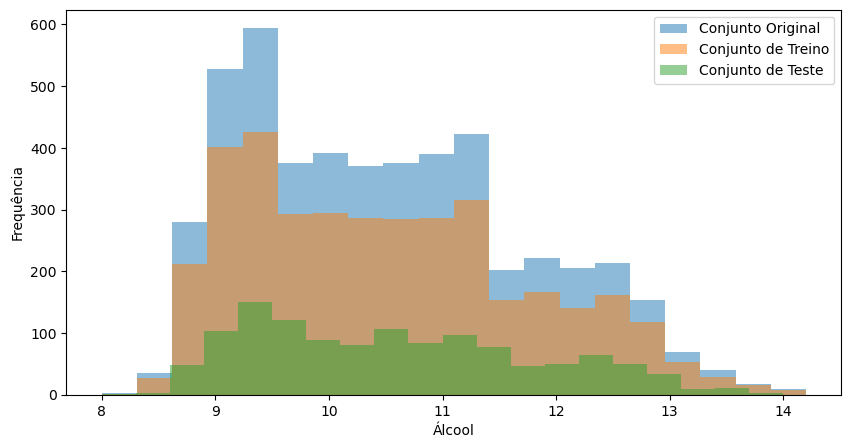

In [8]:
# Separar os dados em treino e teste de forma aleatória
train_data, test_data = train_test_split(data, test_size=0.25, random_state=42)
# Estatísticas descritivas para o conjunto original
print("Estatísticas Descritivas do Conjunto Original:")
print(data.describe())

# Estatísticas descritivas para o conjunto de treino
print("\nEstatísticas Descritivas do Conjunto de Treino:")
print(train_data.describe())

# Estatísticas descritivas para o conjunto de teste
print("\nEstatísticas Descritivas do Conjunto de Teste:")
print(test_data.describe())
# Histograma comparativo da coluna 'alcohol'
plt.figure(figsize=(10, 5))
plt.hist(data['alcohol'], bins=20, alpha=0.5, label='Conjunto Original')
plt.hist(train_data['alcohol'], bins=20, alpha=0.5, label='Conjunto de Treino')
plt.hist(test_data['alcohol'], bins=20, alpha=0.5, label='Conjunto de Teste')
plt.xlabel('Álcool')
plt.ylabel('Frequência')
plt.legend()
plt.show()


In [9]:
# Inicializar o objeto de normalização
scaler = StandardScaler()

# Ajustar e transformar os dados de treino
train_data_scaled = scaler.fit_transform(train_data)

# Transformar os dados de teste usando a mesma transformação
test_data_scaled = scaler.transform(test_data)


In [10]:
# Inicializar o modelo de regressão PLS
pls = PLSRegression(n_components=5)  # Defina o número de componentes desejados

# Ajustar o modelo aos dados de treino
pls.fit(train_data_scaled, train_data['alcohol'])

# Prever os valores de 'alcohol' para o conjunto de teste
predicted_alcohol = pls.predict(test_data_scaled)

# Calcular RMSE e R2 para o conjunto de teste
rmse = np.sqrt(mean_squared_error(test_data['alcohol'], predicted_alcohol))
r2 = r2_score(test_data['alcohol'], predicted_alcohol)

# Imprimir os resultados
print(f"RMSE no conjunto de teste: {rmse:.2f}")
print(f"R2 no conjunto de teste: {r2:.2f}")

RMSE no conjunto de teste: 0.05
R2 no conjunto de teste: 1.00


Número ótimo de componentes: 10


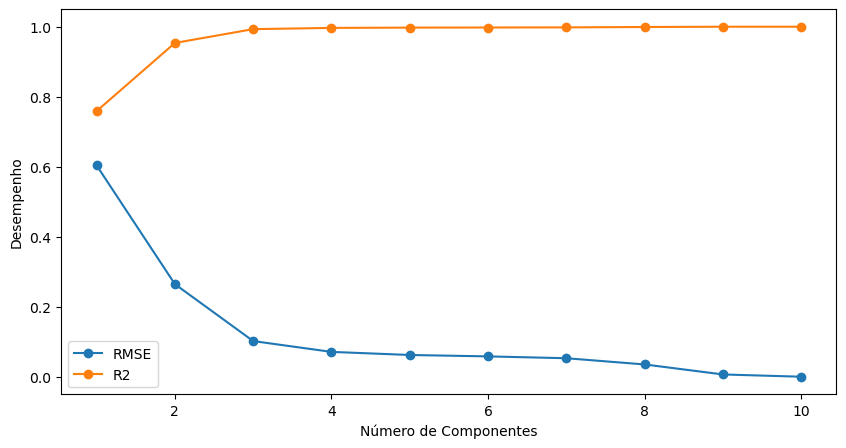

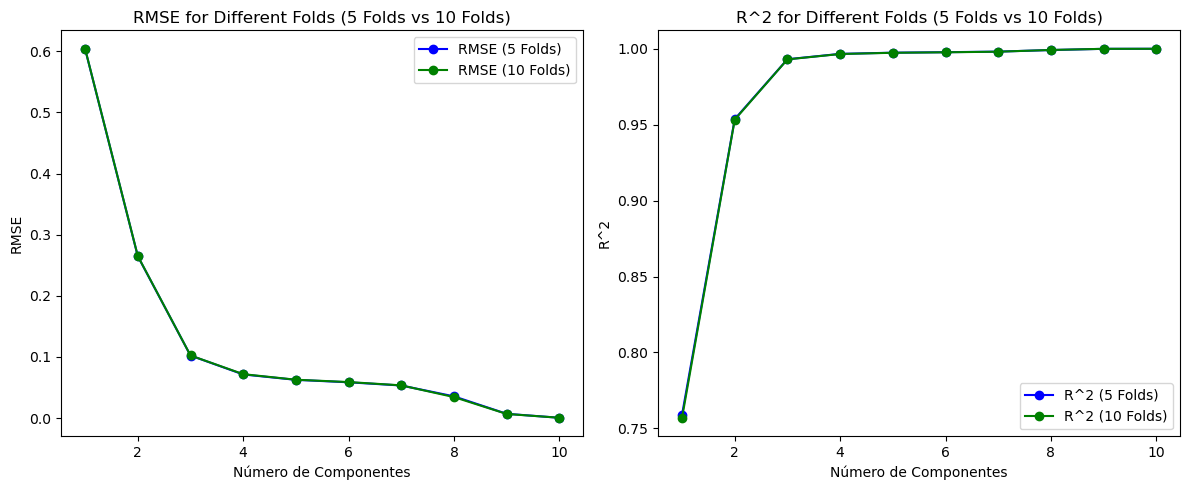

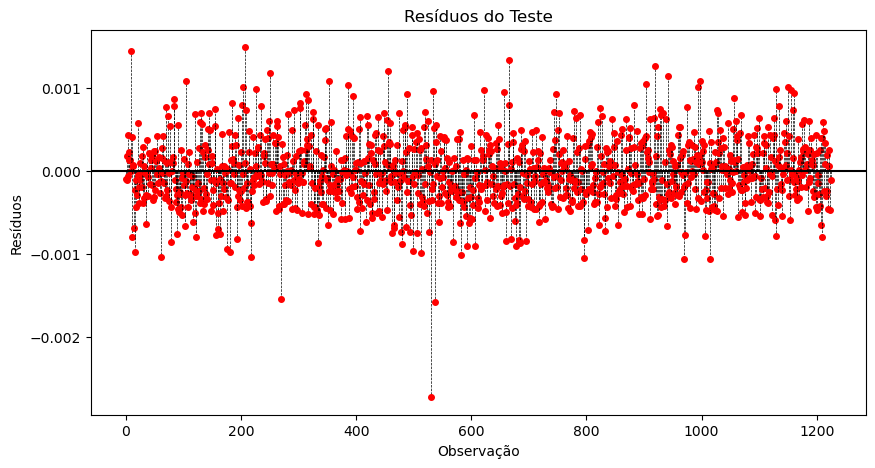

In [22]:
from sklearn.model_selection import cross_val_score

# Criar uma lista de número de componentes para avaliar
n_components_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Inicializar listas para armazenar os resultados
rmse_scores_5 = []
r2_scores_5 = []
rmse_scores_10 = []
r2_scores_10 = []

# Inicializar listas para armazenar os resultados
rmse_scores = []
r2_scores = []

for n_components in n_components_list:
    pls = PLSRegression(n_components=n_components)
    # Realizar validação cruzada com 5 dobras
    rmse_cv = np.sqrt(-np.mean(cross_val_score(pls, train_data_scaled, train_data['alcohol'], cv=5, scoring='neg_mean_squared_error')))
    r2_cv = np.mean(cross_val_score(pls, train_data_scaled, train_data['alcohol'], cv=5, scoring='r2'))
    rmse_scores.append(rmse_cv)
    r2_scores.append(r2_cv)
    
    # Realizar validação cruzada com 5 dobras
    rmse_cv_5 = np.sqrt(-np.mean(cross_val_score(pls, train_data_scaled, train_data['alcohol'], cv=5, scoring='neg_mean_squared_error')))
    r2_cv_5 = np.mean(cross_val_score(pls, train_data_scaled, train_data['alcohol'], cv=5, scoring='r2'))
    rmse_scores_5.append(rmse_cv_5)
    r2_scores_5.append(r2_cv_5)
    
    # Realizar validação cruzada com 10 dobras
    rmse_cv_10 = np.sqrt(-np.mean(cross_val_score(pls, train_data_scaled, train_data['alcohol'], cv=10, scoring='neg_mean_squared_error')))
    r2_cv_10 = np.mean(cross_val_score(pls, train_data_scaled, train_data['alcohol'], cv=10, scoring='r2'))
    rmse_scores_10.append(rmse_cv_10)
    r2_scores_10.append(r2_cv_10)

# Encontrar o número ótimo de componentes com base no menor RMSE
optimal_components = n_components_list[np.argmin(rmse_scores)]
print(f"Número ótimo de componentes: {optimal_components}")

# Plotar perfil de validação cruzada
plt.figure(figsize=(10, 5))
plt.plot(n_components_list, rmse_scores, marker='o', label='RMSE')
plt.plot(n_components_list, r2_scores, marker='o', label='R2')
plt.xlabel('Número de Componentes')
plt.ylabel('Desempenho')
plt.legend()
plt.show()

# Gráfico de RMSE para 5 folds e 10 folds
plt.figure(figsize=(12, 5))  # Ajuste a largura da figura
plt.subplot(1, 2, 1)
plt.plot(n_components_list, rmse_scores, marker='o', label='RMSE (5 Folds)', color='b')
plt.plot(n_components_list, rmse_scores_10, marker='o', label='RMSE (10 Folds)', color='g')
plt.xlabel('Número de Componentes')
plt.ylabel('RMSE')
plt.title('RMSE for Different Folds (5 Folds vs 10 Folds)')
plt.legend()

# Gráfico de R^2 para 5 folds e 10 folds
plt.subplot(1, 2, 2)
plt.plot(n_components_list, r2_scores, marker='o', label='R^2 (5 Folds)', color='b')
plt.plot(n_components_list, r2_scores_10, marker='o', label='R^2 (10 Folds)', color='g')
plt.xlabel('Número de Componentes')
plt.ylabel('R^2')
plt.title('R^2 for Different Folds (5 Folds vs 10 Folds)')
plt.legend()

plt.tight_layout()
plt.show()


# Após ajustar o modelo de regressão PLS
pls.fit(train_data_scaled, train_data['alcohol'])

# Prever os valores de 'alcohol' para o conjunto de teste
predicted_alcohol = pls.predict(test_data_scaled)

# Calcular os resíduos
residuals = test_data['alcohol'].values.ravel() - predicted_alcohol.ravel()

# Criando o gráfico de resíduos
fig, ax = plt.subplots(figsize=(10, 5))
# Plotando os resíduos do teste, conectando cada ponto à linha y=0
for i, residual_value in enumerate(residuals):
    ax.plot([i, i], [0, residual_value], color='black', linestyle='--', linewidth=0.5)
    ax.plot(i, residual_value, marker='o', markersize=4, color='red')

# Adicionando uma linha horizontal y=0 para referência
ax.axhline(y=0, color='black', linestyle='-')
# Configurando labels
ax.set_xlabel('Observação')
ax.set_ylabel('Resíduos')
ax.set_title('Resíduos do Teste')

plt.show()
